In [1]:
import sys
import localSettings as ls
print(ls.main_path)

/home/david/data/searchingfornues/v08_00_00_33/cc0pinp/0129/


In [2]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 01302020


In [3]:
import uproot
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})


In [4]:


fold = "nuselection"
tree = "NeutrinoSelectionFilter"

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
     "category", "shr_tkfit_dedx_Y",
    #"shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    "crtveto","crthitpe",#"_closestNuCosmicDist",
    "NeutrinoEnergy2",
    "run","sub","evt",
    "CosmicIP",
    "merge_bestdist",
    "flash_pe",
    "nu_flashmatch_score",
    "topological_score",
    "weightsGenie_vec",
    "isVtxInFiducial","truthFiducial",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist0","trkshrhitdist1","trkshrhitdist2", # distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "nproton", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "npi0",
    "weightSpline","weightTune","weightSplineTimesTune",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    "slclustfrac", "contained_fraction",
    # second-shower tagging variables
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "secondshower_V_nhit","secondshower_V_vtxdist","secondshower_V_dot","secondshower_V_dir","shrclusdir1",
    "secondshower_U_nhit","secondshower_U_vtxdist","secondshower_U_dot","secondshower_U_dir","shrclusdir0",
    #
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",# gap10 dedx
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",# 2cm dedx
    "pi0_radlen1","pi0_radlen2","pi0_dot1","pi0_dot2","pi0_energy1_Y","pi0_energy2_Y",
    "pi0_dedx1_fit_Y","pi0_dedx2_fit_Y","pi0_shrscore1","pi0_shrscore2","pi0_gammadot",
    "pi0_mass_Y","pi0_mass_V","pi0_mass_U"
]
    

FnueCV = "prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root"
uproot_nue  = uproot.open(ls.main_path+FnueCV)[fold][tree]
df_nue      = uproot_nue.pandas.df(variables, flatten=False)

In [5]:
# 1eNp box-cuts
# nue pre-selection
QUERY = 'nslice == 1'
QUERY += ' and selected == 1'
QUERY += ' and n_tracks_contained > 0'
QUERY += ' and shr_energy_tot_cali > 0.07'
QUERY += ' and n_tracks_contained > 0'
# Loose box cuts
QUERY += ' and n_showers_contained == 1'
QUERY += ' and hits_ratio > 0.5'
QUERY += ' and tksh_distance < 6.0'
QUERY += ' and shr_tkfit_2cm_dedx_Y < 4.0'
QUERY += ' and tksh_angle > -0.9'
QUERY += ' and trkpid < 0.1'
QUERY += ' and shr_score < 0.30'
QUERY += ' and CosmicIP > 20.'
# Box cuts
QUERY += ' and tksh_distance < 3.5'
QUERY += ' and (shr_tkfit_gap10_dedx_Y > 0 and shr_tkfit_gap10_dedx_Y < 4.5 and shr_tkfit_gap10_dedx_U < 4.5 and shr_tkfit_gap10_dedx_V < 4.5)'
QUERY += ' and (shr_tkfit_2cm_dedx_Y > 0 and shr_tkfit_2cm_dedx_Y < 4.0 and shr_tkfit_2cm_dedx_U < 4.0 and shr_tkfit_2cm_dedx_V < 4.0)'
QUERY += ' and tksh_angle > -0.9 and tksh_angle < 0.7'
#QUERY += ' and shrmoliereavg > 2 and shrmoliereavg < 9'
QUERY += ' and trkpid < -0.02'
QUERY += ' and n_showers_contained == 1'
QUERY += ' and shr_score < 0.275'
QUERY += ' and hits_ratio > 0.60'
QUERY += ' and CosmicIP > 20.'
QUERY += ' and (secondshower_Y_nhit<=8 or secondshower_Y_dot<=0.8 or anglediff_Y<=40 or secondshower_Y_vtxdist>=100)'
QUERY += ' and (trkfit < 0.45 or subcluster > 6)'

In [6]:
import awkward

In [7]:
trk_llr_pid_v = uproot_nue.array('trk_llr_pid_score_v')
trk_id = uproot_nue.array('trk_id')-1 # I think we need this -1 to get the right result
trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
df_nue['trkpid'] = trk_llr_pid_v_sel
df_nue['subcluster'] = df_nue['shrsubclusters0'] + df_nue['shrsubclusters1'] + df_nue['shrsubclusters2']
df_nue['trkfit'] = df_nue['shr_tkfit_npointsvalid'] / df_nue['shr_tkfit_npoints']
df_nue['anglediff_Y'] = np.abs(df_nue['secondshower_Y_dir']-df_nue['shrclusdir2'])
df_nue["reco_e"] = (df_nue["shr_energy_tot_cali"] + 0.030) / 0.79 + df_nue["trk_energy_tot"]

In [8]:
VAR = 25

In [9]:
LABEL_V = ['AGKYpT1pi_Genie','AGKYxF1pi_Genie','AhtBY_Genie','AxFFCCQEshape_Genie',\
          'BhtBY_Genie','CV1uBY_Genie','CV2uBY_Genie','DecayAngMEC_Genie',\
          'EtaNCEL_Genie','FrAbs_N_Genie','FrAbs_pi_Genie','FrCEx_N_Genie',\
          'FrCEx_pi_Genie','FrInel_N_Genie','FrInel_pi_Genie','FrPiProd_N_Genie',\
          'FrPiProd_pi_Genie','FracDelta_CCMEC_Genie','FracPN_CCMEC_Genie',\
          'MFP_N_Genie','MFP_pi_Genie','MaCCQE_Genie','MaCCRES_Genie',\
          'MaNCEL_Genie','MaNCRES_Genie','MvCCRES_Genie','MvNCRES_Genie',\
          'NonRESBGvbarnCC1pi_Genie','NonRESBGvbarnCC2pi_Genie','NonRESBGvbarnNC1pi_Genie',\
          'NonRESBGvbarnNC2pi_Genie','NonRESBGvbarpCC1pi_Genie','NonRESBGvbarpCC2pi_Genie',\
          'NonRESBGvbarpNC1pi_Genie','NonRESBGvbarpNC2pi_Genie','NonRESBGvnCC1pi_Genie',\
          'NonRESBGvnCC2pi_Genie','NonRESBGvnNC1pi_Genie','NonRESBGvnNC2pi_Genie',\
          'NonRESBGvpCC1pi_Genie','NonRESBGvpCC2pi_Genie','NonRESBGvpNC1pi_Genie',\
          'NonRESBGvpNC2pi_Genie','NormCCMEC_Genie','NormNCMEC_Genie','RDecBR1eta_Genie',
          'RDecBR1gamma_Genie','RPA_CCQE_Genie','Theta_Delta2Npi_Genie','VecFFCCQEshape_Genie',\
          'XSecShape_CCMEC_Genie']

In [21]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 16})

In [24]:
POT = 5.83e22
SCALE = 10.1e20/POT

/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

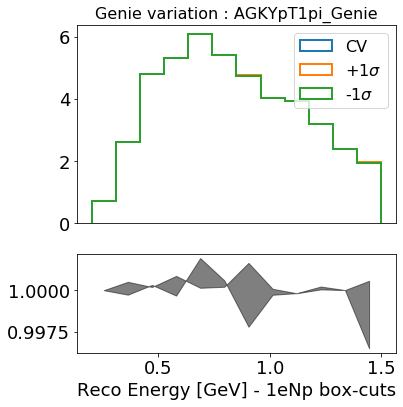

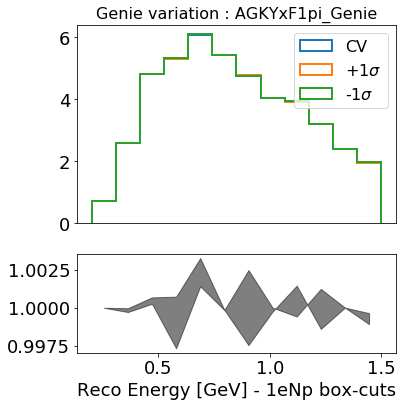

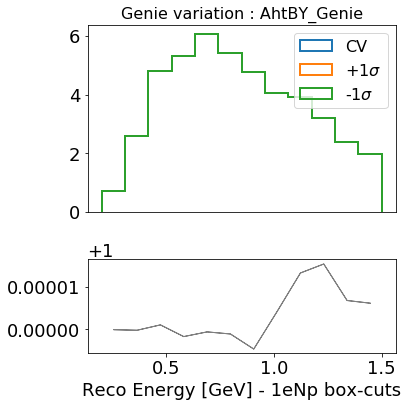

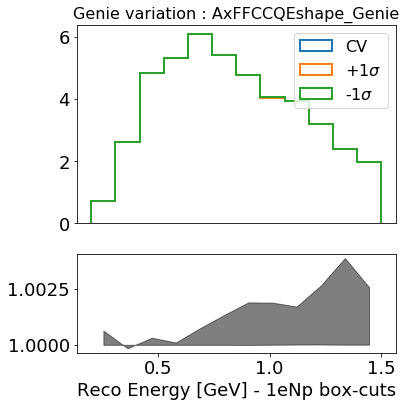

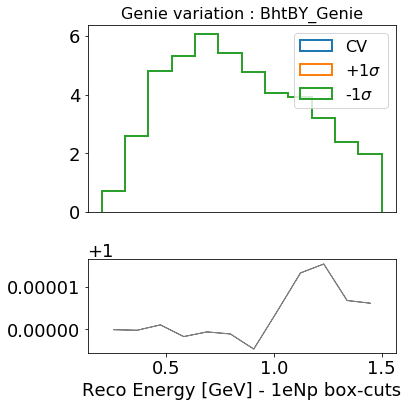

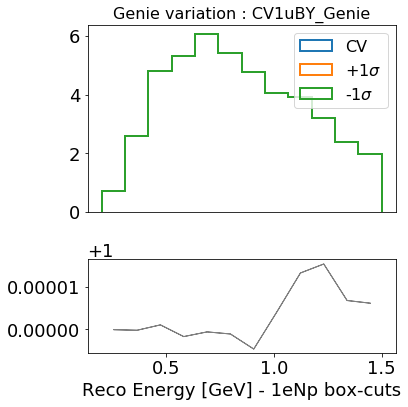

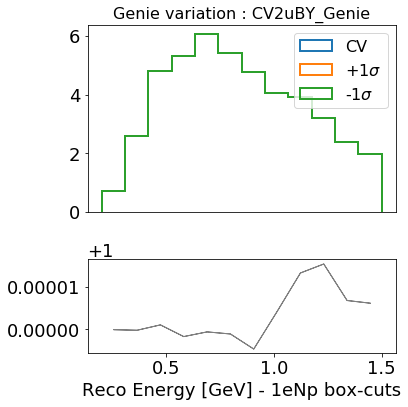

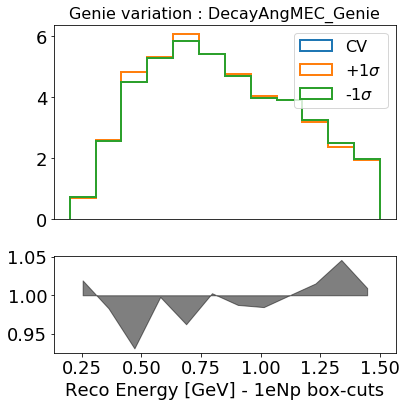

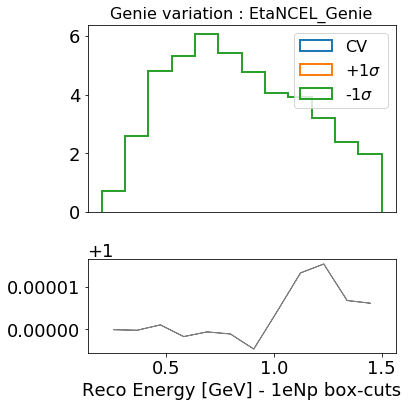

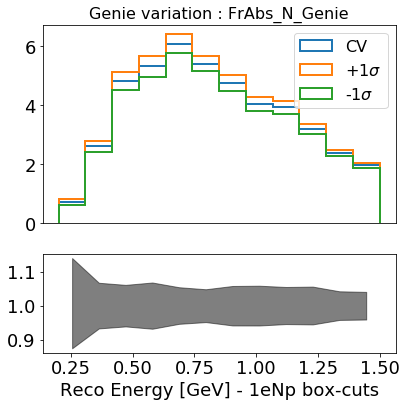

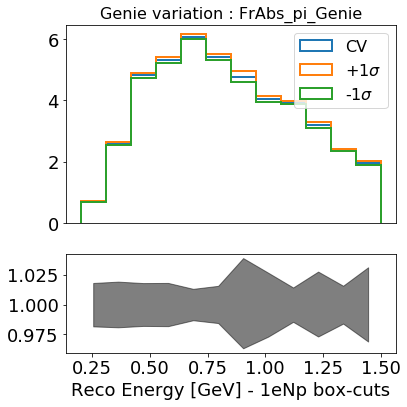

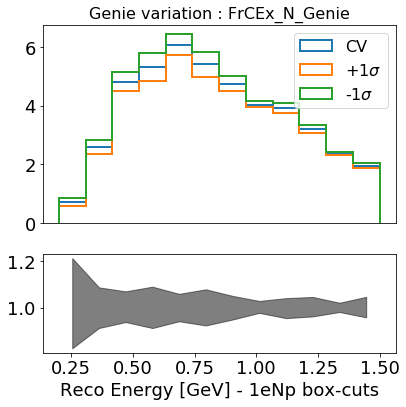

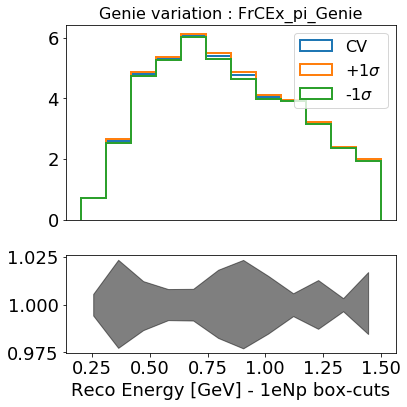

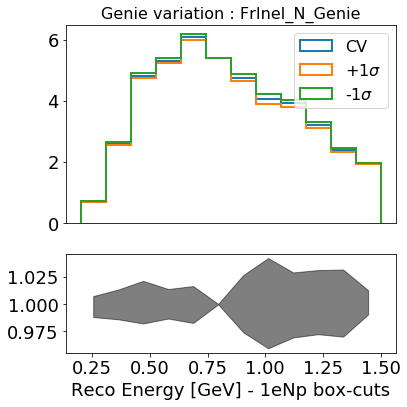

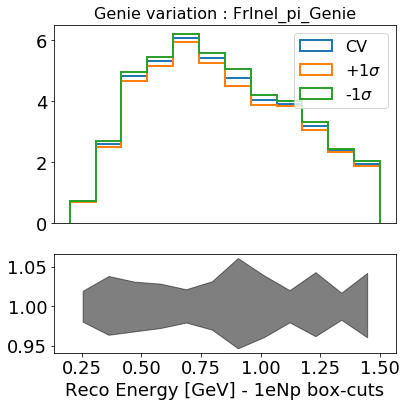

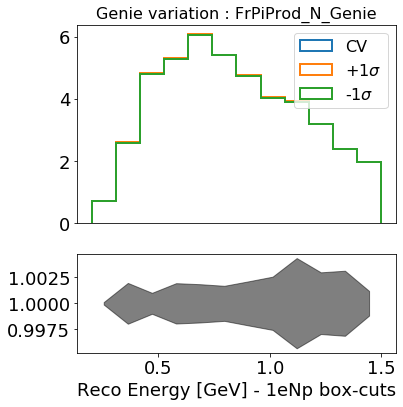

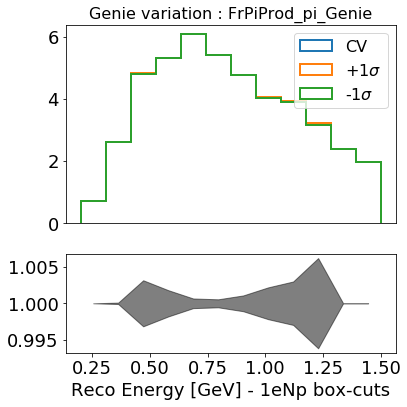

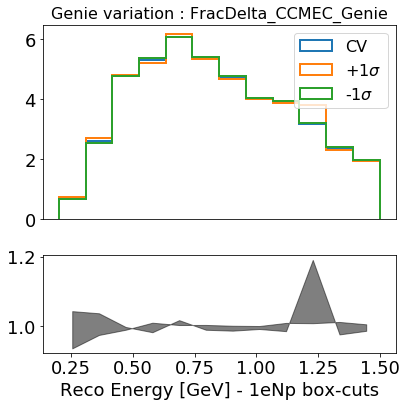

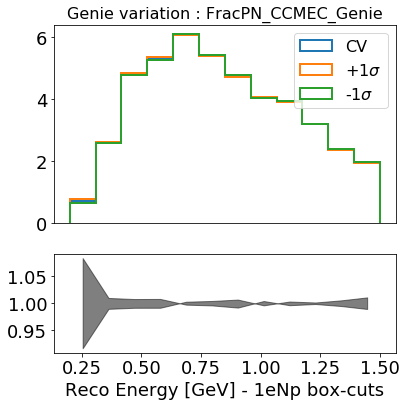

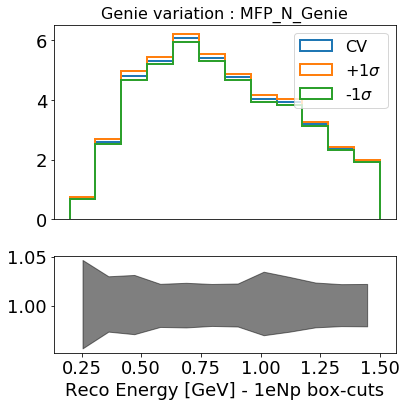

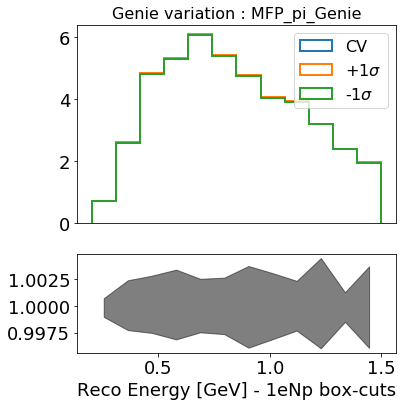

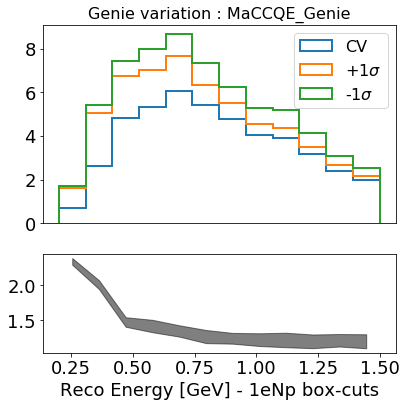

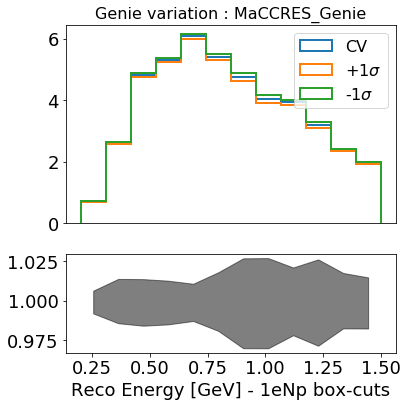

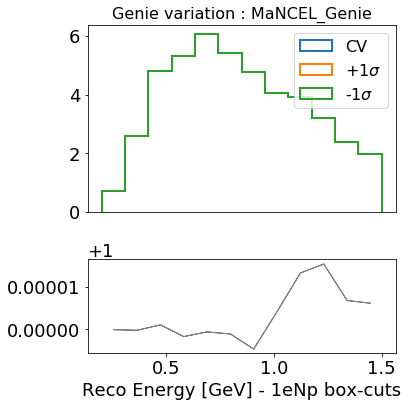

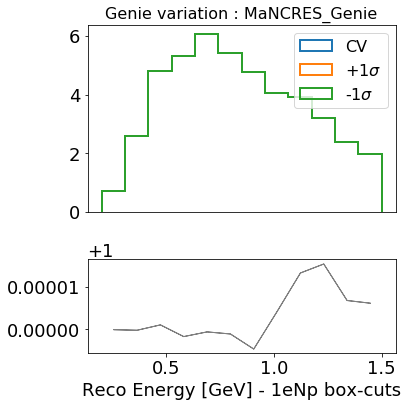

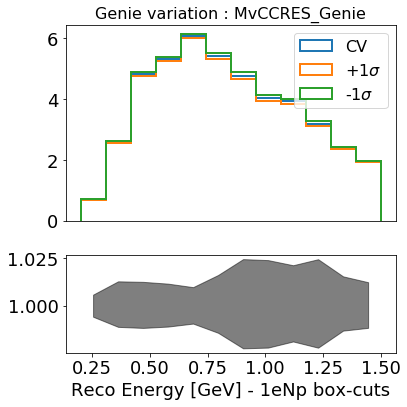

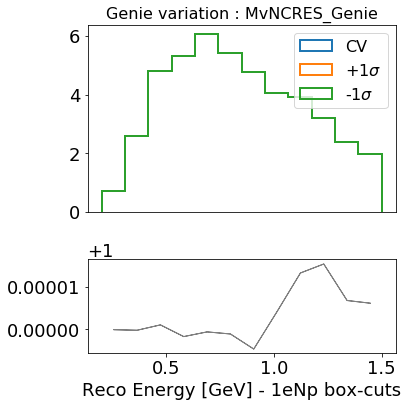

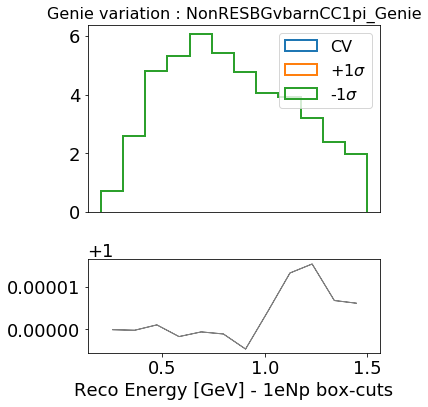

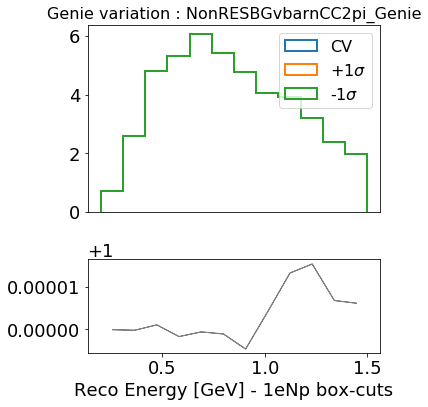

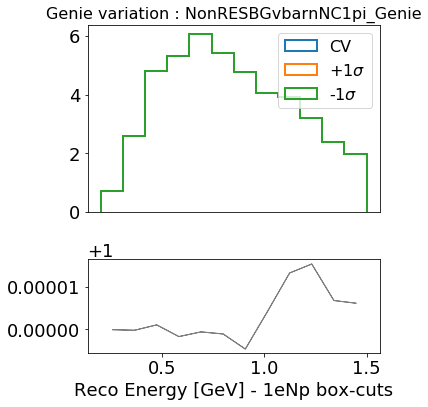

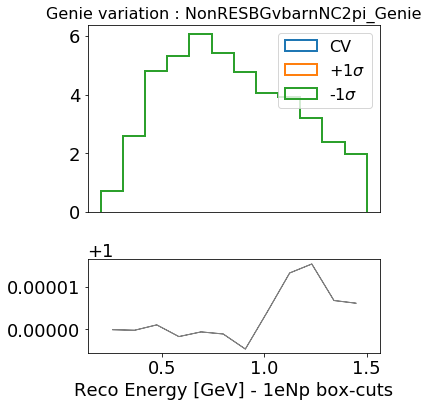

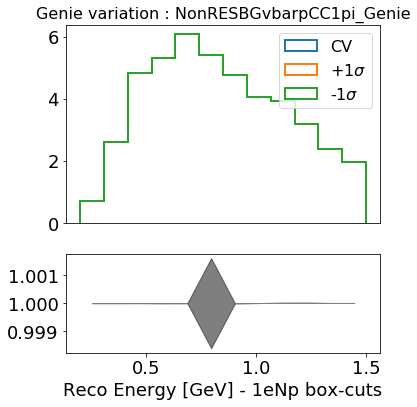

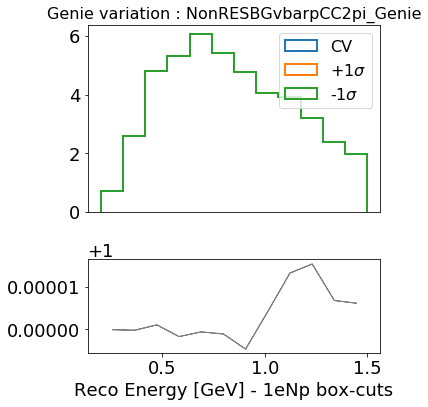

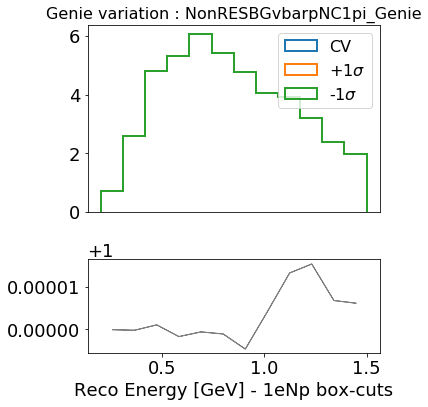

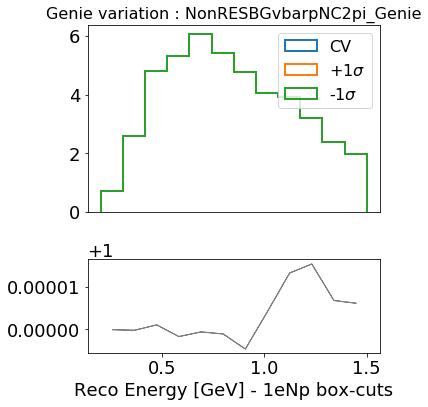

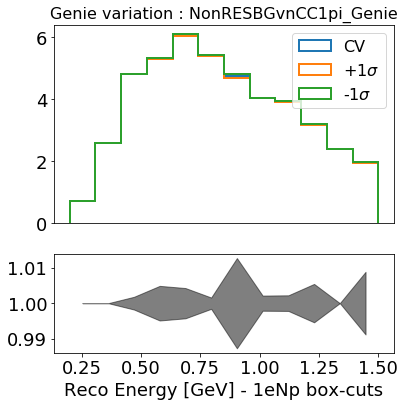

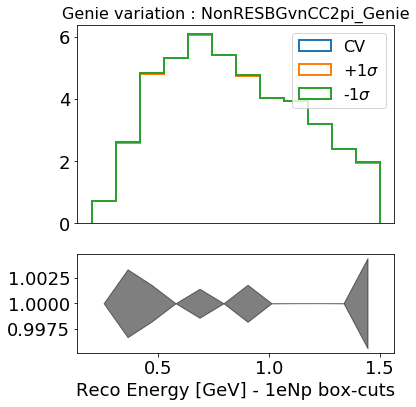

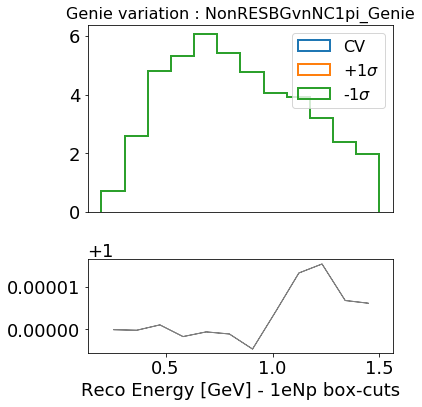

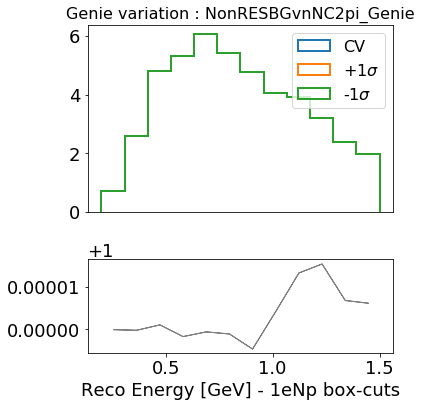

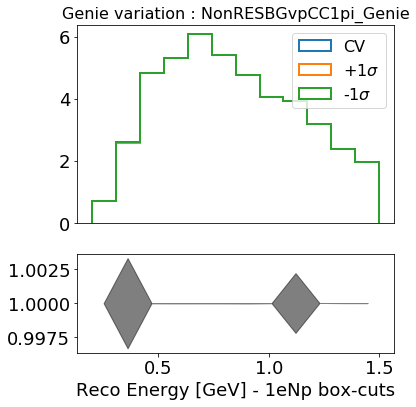

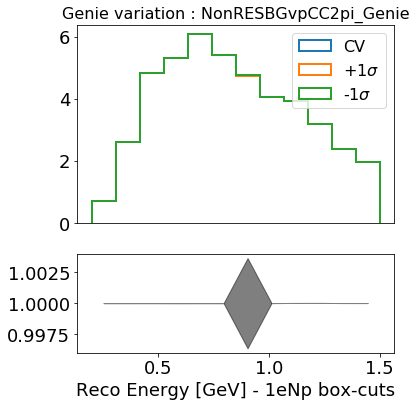

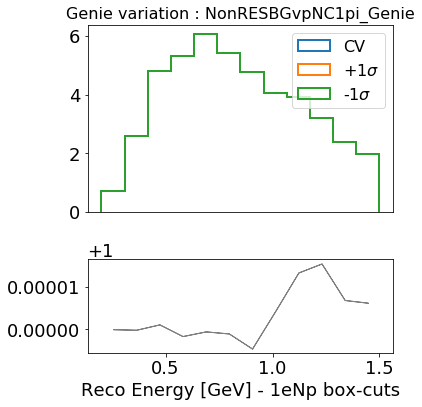

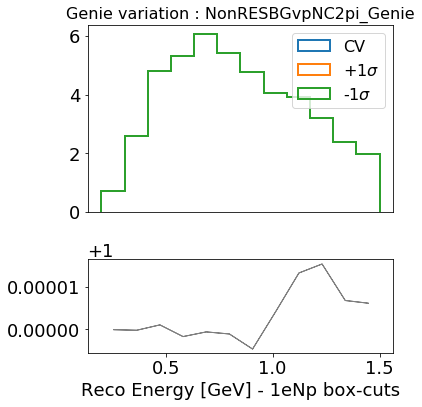

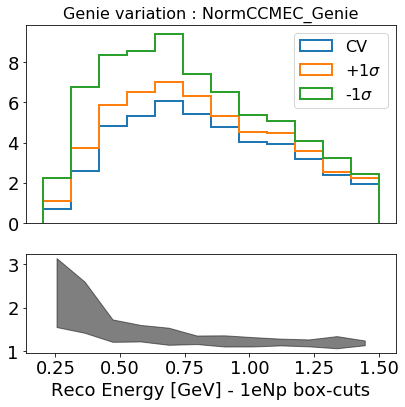

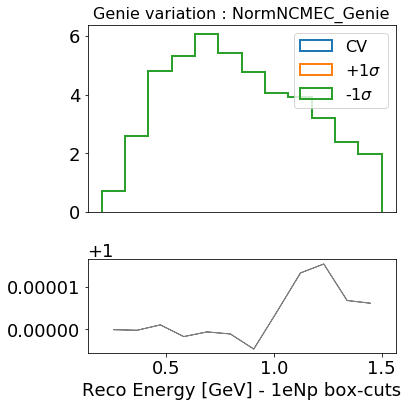

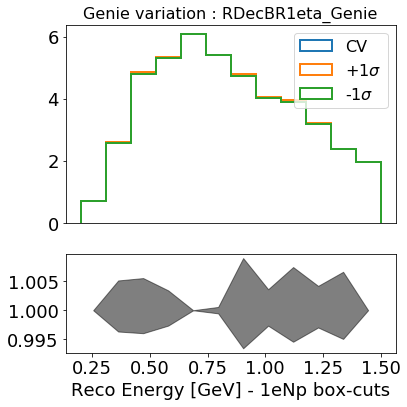

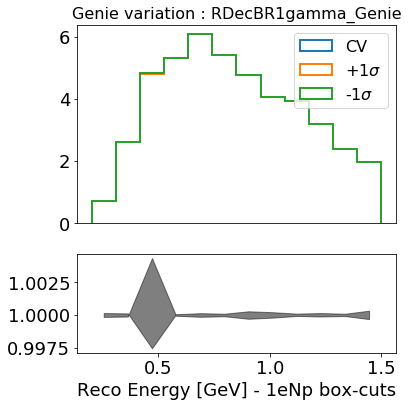

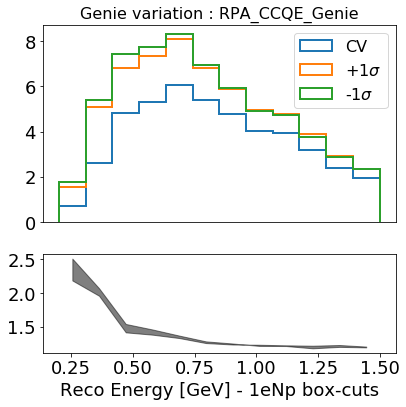

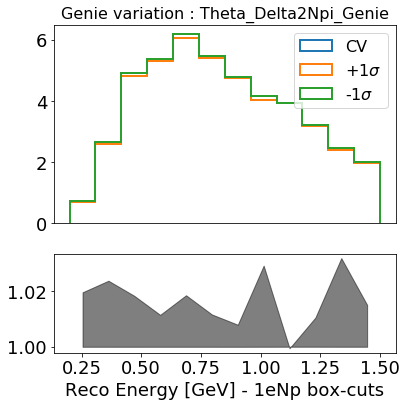

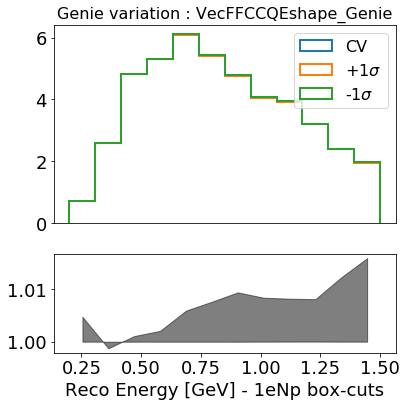

In [28]:
for N in range(50):
    weightsGenie_v = uproot_nue.array('weightsGenie_vec')

    genievardn = awkward.fromiter([weightsGenie[N*2] for weightsGenie in weightsGenie_v])
    df_nue['genievardn'] = genievardn

    genievarup = awkward.fromiter([weightsGenie[N*2+1] for weightsGenie in weightsGenie_v])
    df_nue['genievarup'] = genievarup
    
    df_nue.loc[ df_nue['genievardn'] <= 0, 'genievardn' ] = 1.
    df_nue.loc[ df_nue['genievardn'] == np.inf, 'genievardn' ] = 1.
    df_nue.loc[ df_nue['genievardn'] > 100, 'genievardn' ] = 1.
    df_nue.loc[ np.isnan(df_nue['genievardn']) == True, 'genievardn' ] = 1.

    df_nue.loc[ df_nue['genievarup'] <= 0, 'genievarup' ] = 1.
    df_nue.loc[ df_nue['genievarup'] == np.inf, 'genievarup' ] = 1.
    df_nue.loc[ df_nue['genievarup'] > 100, 'genievarup' ] = 1.
    df_nue.loc[ np.isnan(df_nue['genievarup']) == True, 'genievarup' ] = 1.
    
    df_nue.loc[ df_nue['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df_nue.loc[ df_nue['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df_nue.loc[ df_nue['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df_nue.loc[ np.isnan(df_nue['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 

    df_nue_sel = df_nue.query(QUERY)
           
    fig = plt.figure(figsize=(6,6))
    var = df_nue_sel['reco_e'].values
    weights_cv = df_nue_sel['weightSplineTimesTune'].values * SCALE
    weights_up = df_nue_sel['genievardn'].values * df_nue_sel['weightSplineTimesTune'].values * SCALE
    weights_dn = df_nue_sel['genievarup'].values * df_nue_sel['weightSplineTimesTune'].values * SCALE

    BINS = np.linspace(0.2,1.5,13)
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])


    ax1.set_title('Genie variation : %s'%LABEL_V[N],fontsize=16)
    ax1.set_ylabel('Events / 10.1e20 POT')
    n_cv, bins_cv, patches_cv = ax1.hist(var,bins=BINS,histtype='step',lw=2,weights=weights_cv,label='CV')
    n_dn, bins_dn, patches_dn = ax1.hist(var,bins=BINS,histtype='step',lw=2,weights=weights_dn,label=r'+1$\sigma$')
    n_up, bins_up, patches_up = ax1.hist(var,bins=BINS,histtype='step',lw=2,weights=weights_up,label=r'-1$\sigma$')
    
    bin_c = (bins_cv[:-1]+bins_cv[1:])/2.
    
    #plt.plot()
    
    # statistical errors
    stat_err_v = np.sqrt(n_cv)
    stat_err_v /= n_cv
    
    #ax2.errorbar(bin_c,np.ones(len(bin_c)),yerr=stat_err_v,fmt='o',color='b')
    ax2.fill_between(bin_c,n_dn/n_cv,n_up/n_cv,color='k',alpha=0.5)
    
    ax2.set_xlabel('Reco Energy [GeV] - 1eNp box-cuts')
    ax1.set_xticks([])
    ax1.legend(loc='best',fontsize=16)
    
    ax2.set_xlim(ax1.get_xlim()[0],ax1.get_xlim()[1])
    fig.tight_layout()

    
    #plt.show()
    fig.savefig(ls.plots_path+"genievar/"+LABEL_V[N]+"_"+date_time+".pdf")